In [1]:
import importlib
import sys

from tqdm import tqdm

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch as th
import networkx as nx
import torch_geometric as pyg

import LPGNN

/home/mf/anaconda3/envs/MachineLearning/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2022-09-11 01:21:00.018791: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-11 01:21:00.018815: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
importlib.reload(LPGNN.popularity_similarity)
importlib.reload(LPGNN.embedding)
importlib.reload(LPGNN.poincare_embedding)
importlib.reload(LPGNN.distances)
importlib.reload(LPGNN.visualization.degree_distribution)
importlib.reload(LPGNN.visualization)
importlib.reload(LPGNN.utils)
importlib.reload(LPGNN.labne)
importlib.reload(LPGNN.graph_metrics)
importlib.reload(LPGNN.DataSetup)
importlib.reload(LPGNN.tree_pruning)
importlib.reload(LPGNN.LinkPrediction)

<module 'LPGNN.LinkPrediction' from '/home/mf/Documents/IB/Tesis/Maestria/LPGNN/LPGNN/LinkPrediction.py'>

In [3]:
seed = 8900

In [9]:
N = 800
avg_k = 8
gamma = 2.7
T = 0.0
seed += 1
PS = LPGNN.popularity_similarity.generatePSNetwork(N, avg_k, gamma, T, seed, dim=30)

In [10]:
PS = LPGNN.DataSetup.train_test_split(PS, test_ratio=0.4, val_ratio=0, neg_samples=False)
PS_nx = pyg.utils.to_networkx(PS, to_undirected=True)
nx.is_connected(PS_nx)

True

In [11]:
DIMS = [2, 5, 15, 30, 40]
R_LaBNE = []
P_LaBNE = []
R_Poincare = []
P_Poincare = []
for dim in DIMS:
    PS_LaBNE = LPGNN.labne.generateLaBNE(PS, dim=dim)
    R, P = LPGNN.LinkPrediction.precision_recall_score_file(PS_LaBNE, position_name='LaBNE_node_positions', filename=f'data/Distance_Lists/PS_many_dim/LaBNE_dim_{dim}', chunk_size=10000, skip_file_prep=False, step_size=100)
    R_LaBNE.append(R)
    P_LaBNE.append(P)

    max_labne_radius = th.sqrt(th.sum(PS_LaBNE.LaBNE_node_positions**2, dim=1)).max()
    init_pos = PS_LaBNE.LaBNE_node_positions / max_labne_radius * 0.1
    PS_Poincare = LPGNN.poincare_embedding.poincare_embedding(PS, epochs=10000, init_pos=init_pos, dim=dim)
    R, P = LPGNN.LinkPrediction.precision_recall_score_file(PS_Poincare, position_name='PoincareEmbedding_node_positions', filename=f'data/Distance_Lists/PS_many_dim/Poincare_dim_{dim}', chunk_size=10000, skip_file_prep=False, step_size=100)
    R_Poincare.append(R)
    P_Poincare.append(P)

Calculating best minimal value for power law fit
Generating test mask...
Total test mask:  tensor(1276.)  . Total test edges:  1276
Generating hyperbolic distances and saving to file  data/Distance_Lists/PS_many_dim/LaBNE_dim_2
Sorting file...
Reading file and generating precision-recall curve...
index: 195800, R: 1.000, P: 0.007

100%|██████████| 10000/10000 [00:10<00:00, 920.24it/s]


Generating test mask...
Total test mask:  tensor(1276.)  . Total test edges:  1276
Generating hyperbolic distances and saving to file  data/Distance_Lists/PS_many_dim/Poincare_dim_2
Sorting file...
Reading file and generating precision-recall curve...
index: 168800, R: 1.000, P: 0.008Calculating best minimal value for power law fit
Generating test mask...
Total test mask:  tensor(1276.)  . Total test edges:  1276
Generating hyperbolic distances and saving to file  data/Distance_Lists/PS_many_dim/LaBNE_dim_5
Sorting file...
Reading file and generating precision-recall curve...
index: 110600, R: 1.000, P: 0.012

100%|██████████| 10000/10000 [00:11<00:00, 907.07it/s]


Generating test mask...
Total test mask:  tensor(1276.)  . Total test edges:  1276
Generating hyperbolic distances and saving to file  data/Distance_Lists/PS_many_dim/Poincare_dim_5
Sorting file...
Reading file and generating precision-recall curve...
index: 126300, R: 1.000, P: 0.010Calculating best minimal value for power law fit
Generating test mask...
Total test mask:  tensor(1276.)  . Total test edges:  1276
Generating hyperbolic distances and saving to file  data/Distance_Lists/PS_many_dim/LaBNE_dim_15
Sorting file...
Reading file and generating precision-recall curve...
index: 46300, R: 1.000, P: 0.028

100%|██████████| 10000/10000 [00:16<00:00, 606.95it/s]


Generating test mask...
Total test mask:  tensor(1276.)  . Total test edges:  1276
Generating hyperbolic distances and saving to file  data/Distance_Lists/PS_many_dim/Poincare_dim_15
Sorting file...
Reading file and generating precision-recall curve...
index: 139500, R: 1.000, P: 0.009Calculating best minimal value for power law fit
Generating test mask...
Total test mask:  tensor(1276.)  . Total test edges:  1276
Generating hyperbolic distances and saving to file  data/Distance_Lists/PS_many_dim/LaBNE_dim_30
Sorting file...
Reading file and generating precision-recall curve...
index: 45000, R: 1.000, P: 0.028

100%|██████████| 10000/10000 [00:25<00:00, 385.92it/s]


Generating test mask...
Total test mask:  tensor(1276.)  . Total test edges:  1276
Generating hyperbolic distances and saving to file  data/Distance_Lists/PS_many_dim/Poincare_dim_30
Sorting file...
Reading file and generating precision-recall curve...
index: 248200, R: 1.000, P: 0.005Calculating best minimal value for power law fit
Generating test mask...
Total test mask:  tensor(1276.)  . Total test edges:  1276
Generating hyperbolic distances and saving to file  data/Distance_Lists/PS_many_dim/LaBNE_dim_40
Sorting file...
Reading file and generating precision-recall curve...
index: 39000, R: 1.000, P: 0.033

100%|██████████| 10000/10000 [00:22<00:00, 436.12it/s]


Generating test mask...
Total test mask:  tensor(1276.)  . Total test edges:  1276
Generating hyperbolic distances and saving to file  data/Distance_Lists/PS_many_dim/Poincare_dim_40
Sorting file...
Reading file and generating precision-recall curve...
index: 241800, R: 1.000, P: 0.005

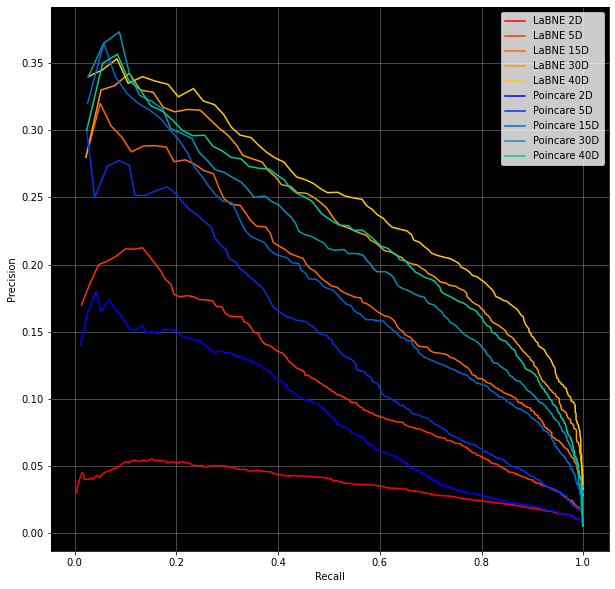

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.set_facecolor((0.0, 0.0, 0.0))
ax.set_xlabel('Recall')
ax.set_ylabel('Precision')
ax.grid(alpha=0.5)

for i, dim in enumerate(DIMS):
    ax.plot(R_LaBNE[i], P_LaBNE[i], label=f'LaBNE {dim}D', c=plt.cm.autumn(i/len(DIMS)))
for i, dim in enumerate(DIMS):
    ax.plot(R_Poincare[i], P_Poincare[i], label=f'Poincare {dim}D', c=plt.cm.winter(i/len(DIMS)))

ax.legend()
#ax.set_ylim(-0.001, 0.012)